# Desarrollo de un sistema de diagnóstico de enfermedades en hojas de tomate mediante PlantCV y modelos de aprendizaje profundo

La detección temprana de enfermedades en cultivos es vital para la agricultura sostenible. Utilizando PlantCV (https://plantcv.readthedocs.io/), una biblioteca enfocada en la visión por computadora para plantas, junto con TensorFlow o PyTorch, el alumno se encargará de crear modelos de clasificación multiclase robustos. Estos modelos tendrán como objetivo identificar 10 distintas enfermedades y una clase de salud en hojas de tomate. Para el entrenamiento y evaluación, se usará el Tomato Leaves Dataset de Kaggle (https://www.kaggle.com/datasets/ashishmotwani/tomato), que contiene más de 20,000 imágenes recogidas en entornos de laboratorio e in situ. Dada la naturaleza práctica de la aplicación, se buscará desarrollar un modelo lo suficientemente eficiente como para poder ser implementado en aplicaciones móviles, permitiendo diagnósticos ágiles y efectivos en el campo.

## Carga de la data

Debido a que solo existe data para train y validacion, se procede a separar un porcentaje para hacer un test final.

In [1]:
from src.utils.data_distribution import create_test_set

create_test_set("./dataset/train", "./dataset/test", percentage=10)

Se movió el 10% de imágenes de train a test correctamente.


Se quitan caracteres innecesarios en el nombre de las carpetas.

In [1]:
from src.utils.rename_files import renombrar_carpetas
renombrar_carpetas("dataset")


Renombrado: Apple___Apple_scab -> Apple_Apple_scab
Renombrado: Apple___Black_rot -> Apple_Black_rot
Renombrado: Apple___Cedar_apple_rust -> Apple_Cedar_apple_rust
Renombrado: Apple___healthy -> Apple_healthy
Renombrado: Blueberry___healthy -> Blueberry_healthy
Renombrado: Cherry_(including_sour)___healthy -> Cherry_including_sour_healthy
Renombrado: Cherry_(including_sour)___Powdery_mildew -> Cherry_including_sour_Powdery_mildew
Renombrado: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot -> Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot
Renombrado: Corn_(maize)___Common_rust_ -> Corn_maize_Common_rust_
Renombrado: Corn_(maize)___healthy -> Corn_maize_healthy
Renombrado: Corn_(maize)___Northern_Leaf_Blight -> Corn_maize_Northern_Leaf_Blight
Renombrado: Grape___Black_rot -> Grape_Black_rot
Renombrado: Grape___Esca_(Black_Measles) -> Grape_Esca_Black_Measles
Renombrado: Grape___healthy -> Grape_healthy
Renombrado: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) -> Grape_Leaf_blight_Isariops

Ya que existen nombres de archivos muy extensos es recomendable renombrarlos a una cantidad de caracteres mas manejables

In [2]:
from src.utils.rename_files import rename_images_in_directory
base_directory = "dataset"
rename_images_in_directory(base_directory)

Renombrando imágenes en: dataset\train\Apple_Apple_scab
Renombrando imágenes en: dataset\train\Apple_Black_rot
Renombrando imágenes en: dataset\train\Apple_Cedar_apple_rust
Renombrando imágenes en: dataset\train\Apple_healthy
Renombrando imágenes en: dataset\train\Blueberry_healthy
Renombrando imágenes en: dataset\train\Cherry_including_sour_healthy
Renombrando imágenes en: dataset\train\Cherry_including_sour_Powdery_mildew
Renombrando imágenes en: dataset\train\Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot
Renombrando imágenes en: dataset\train\Corn_maize_Common_rust_
Renombrando imágenes en: dataset\train\Corn_maize_healthy
Renombrando imágenes en: dataset\train\Corn_maize_Northern_Leaf_Blight
Renombrando imágenes en: dataset\train\Grape_Black_rot
Renombrando imágenes en: dataset\train\Grape_Esca_Black_Measles
Renombrando imágenes en: dataset\train\Grape_healthy
Renombrando imágenes en: dataset\train\Grape_Leaf_blight_Isariopsis_Leaf_Spot
Renombrando imágenes en: dataset\train\Orang

## Exploracion de los datos

Resumen del Dataset:
---------------------
Train Set:
  - Apple_Apple_scab: 1815 imágenes
  - Apple_Black_rot: 1789 imágenes
  - Apple_Cedar_apple_rust: 1584 imágenes
  - Apple_healthy: 1808 imágenes
  - Blueberry_healthy: 1635 imágenes
  - Cherry_including_sour_Powdery_mildew: 1515 imágenes
  - Cherry_including_sour_healthy: 1644 imágenes
  - Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot: 1478 imágenes
  - Corn_maize_Common_rust_: 1717 imágenes
  - Corn_maize_Northern_Leaf_Blight: 1718 imágenes
  - Corn_maize_healthy: 1674 imágenes
  - Grape_Black_rot: 1700 imágenes
  - Grape_Esca_Black_Measles: 1728 imágenes
  - Grape_Leaf_blight_Isariopsis_Leaf_Spot: 1550 imágenes
  - Grape_healthy: 1523 imágenes
  - Orange_Haunglongbing_Citrus_greening: 1809 imágenes
  - Peach_Bacterial_spot: 1655 imágenes
  - Peach_healthy: 1556 imágenes
  - Pepper_bell_Bacterial_spot: 1722 imágenes
  - Pepper_bell_healthy: 1790 imágenes
  - Potato_Early_blight: 1746 imágenes
  - Potato_Late_blight: 1746 imágenes

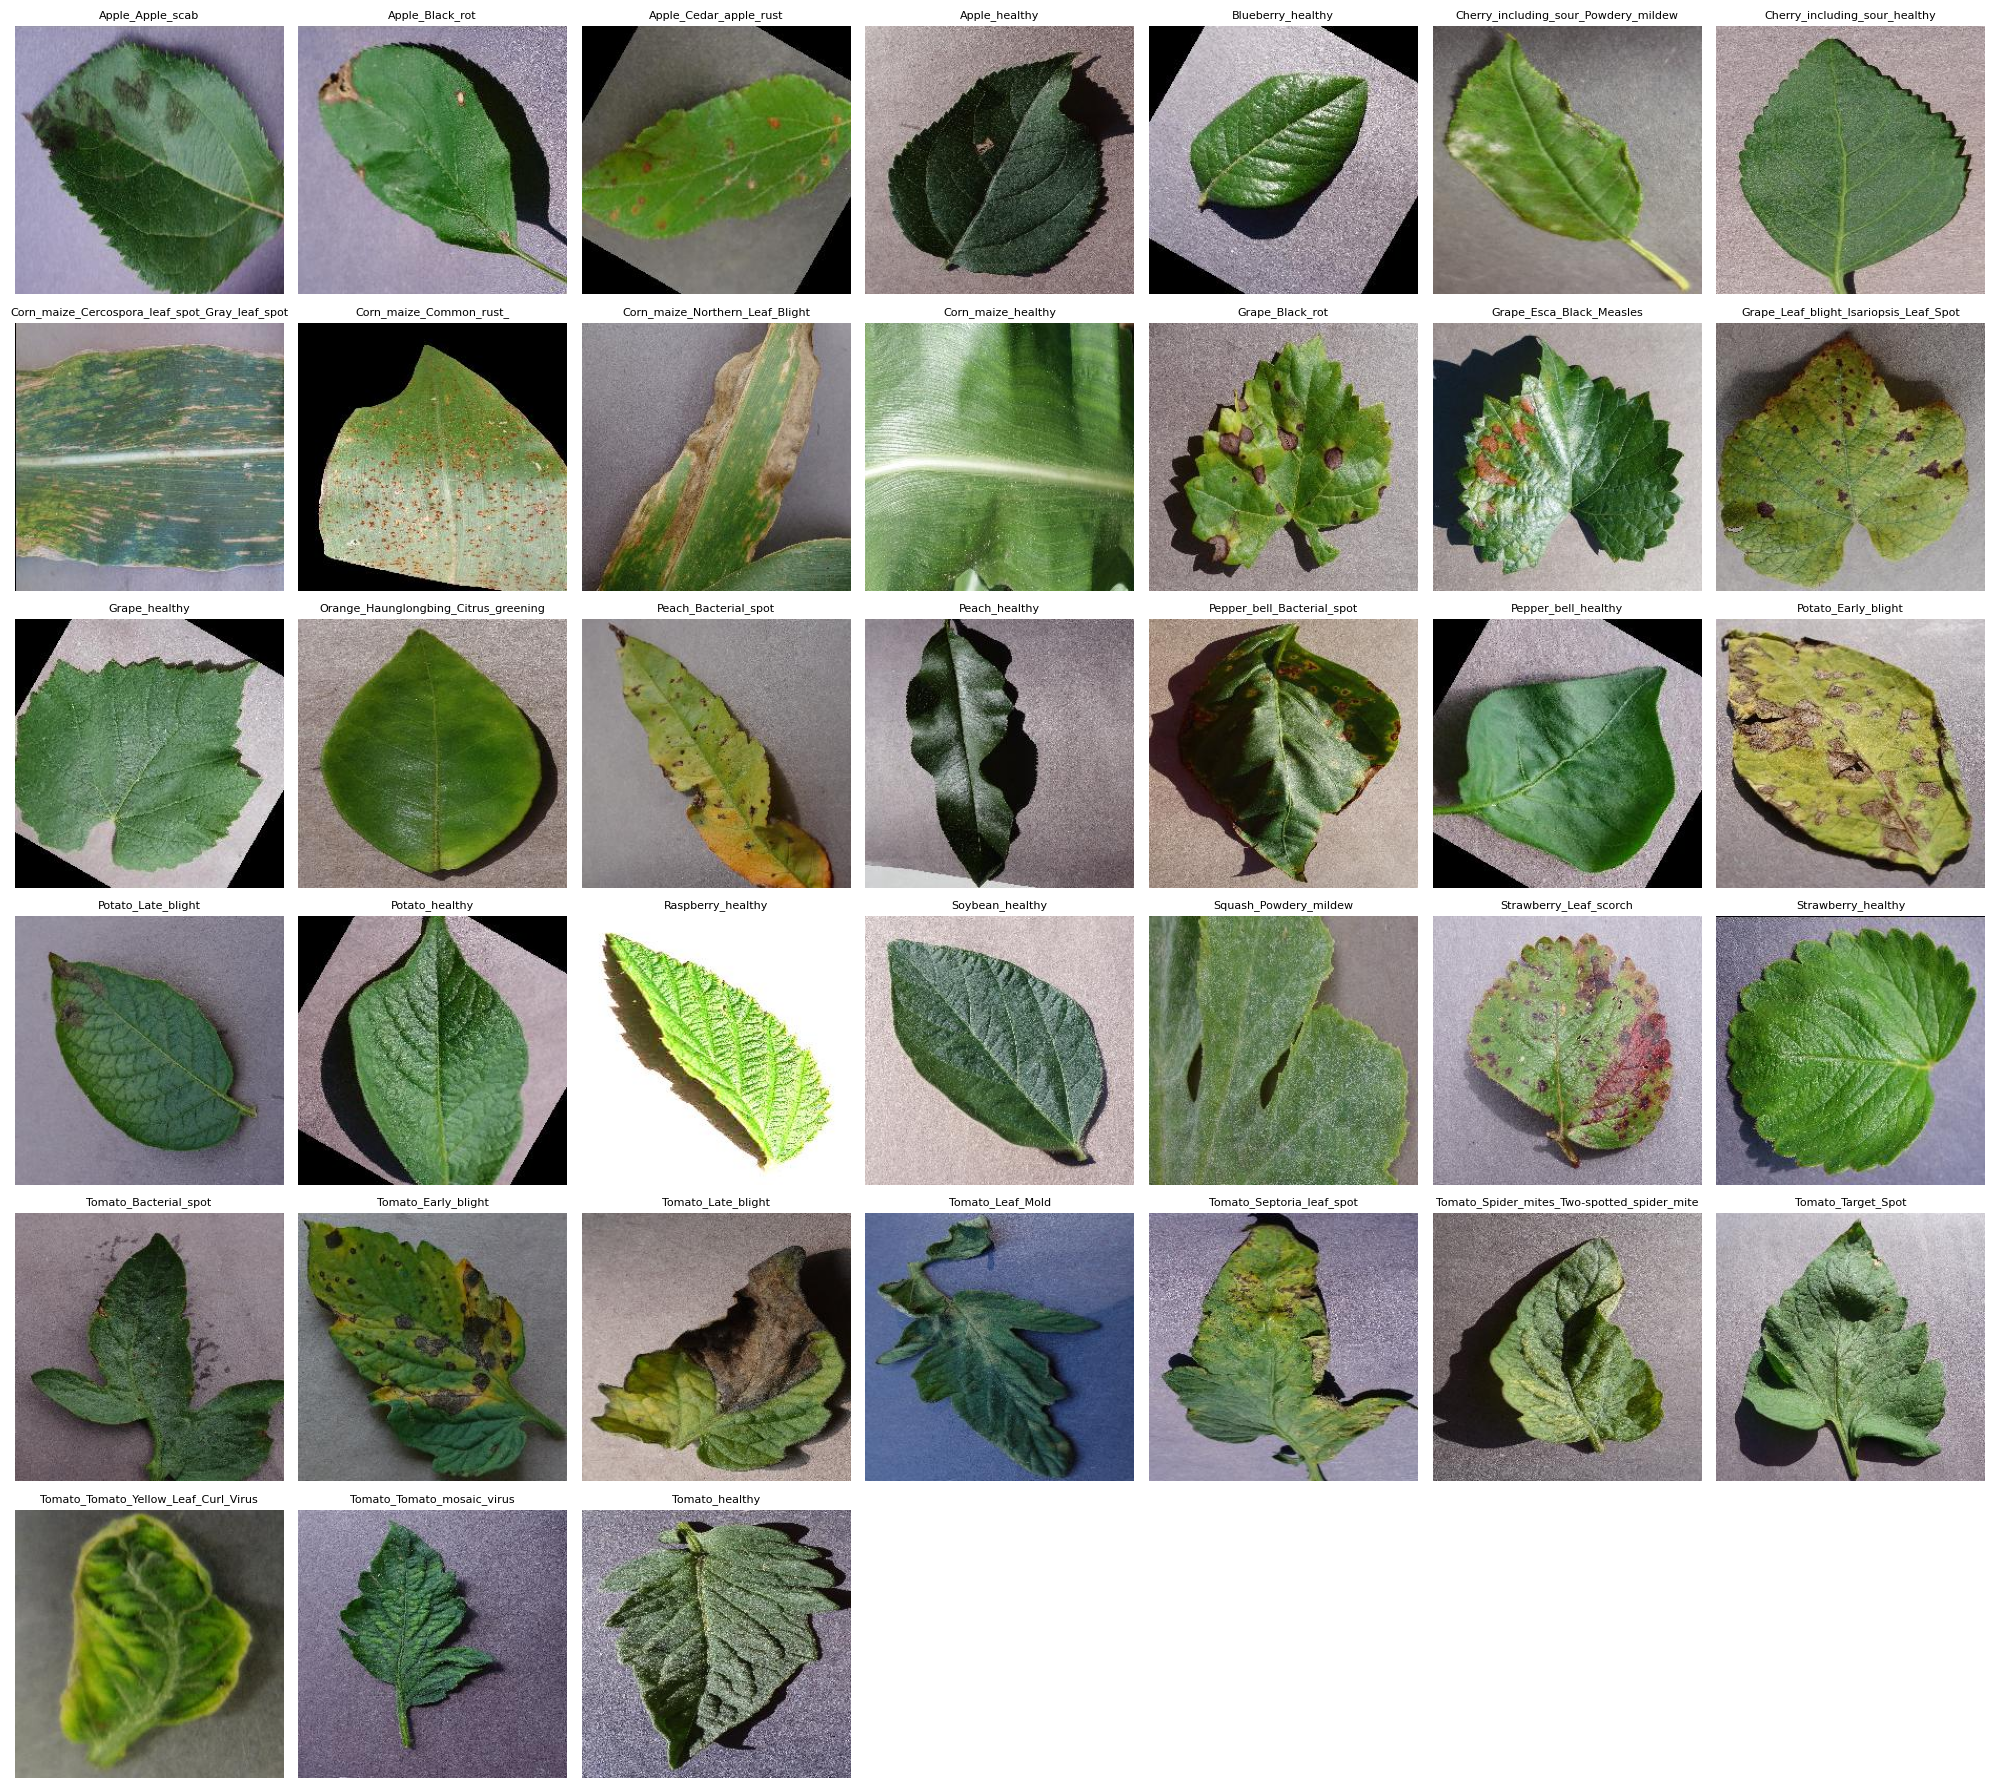

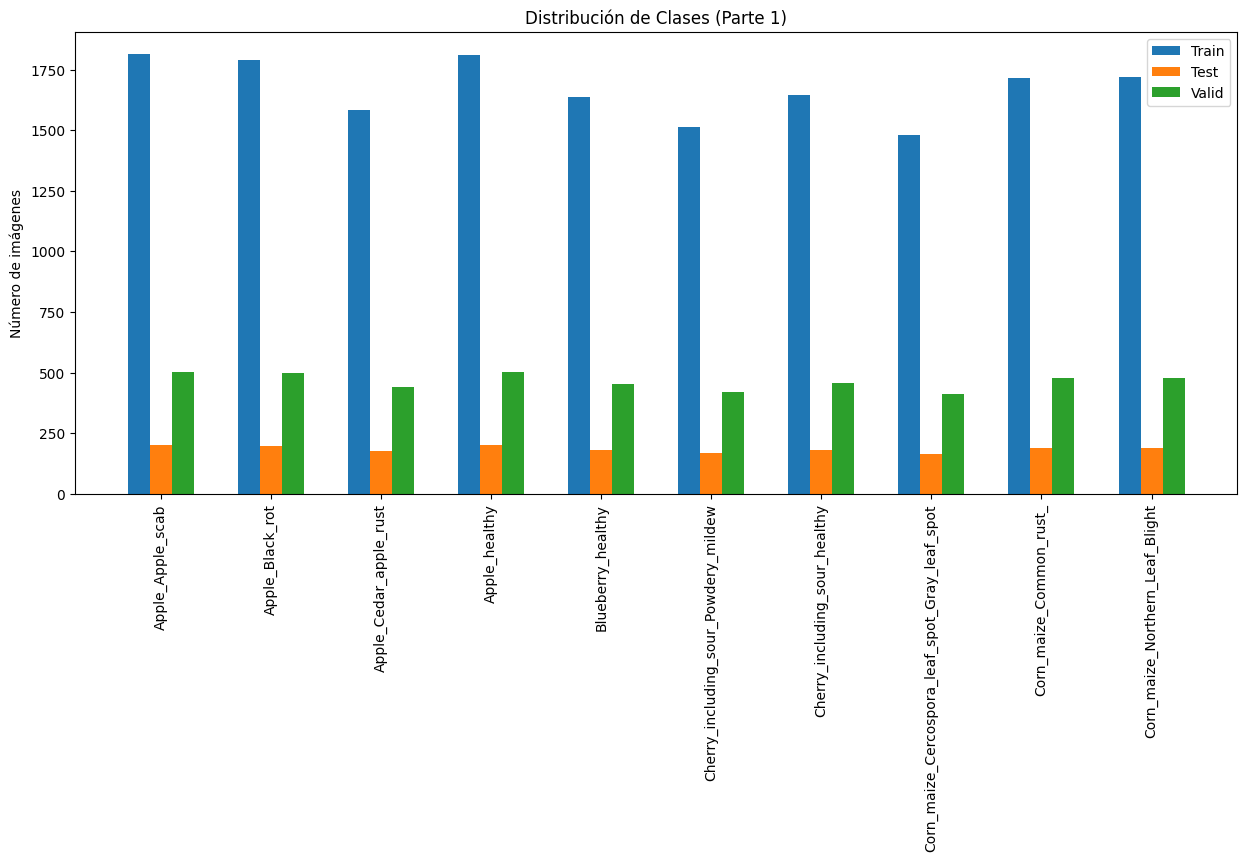

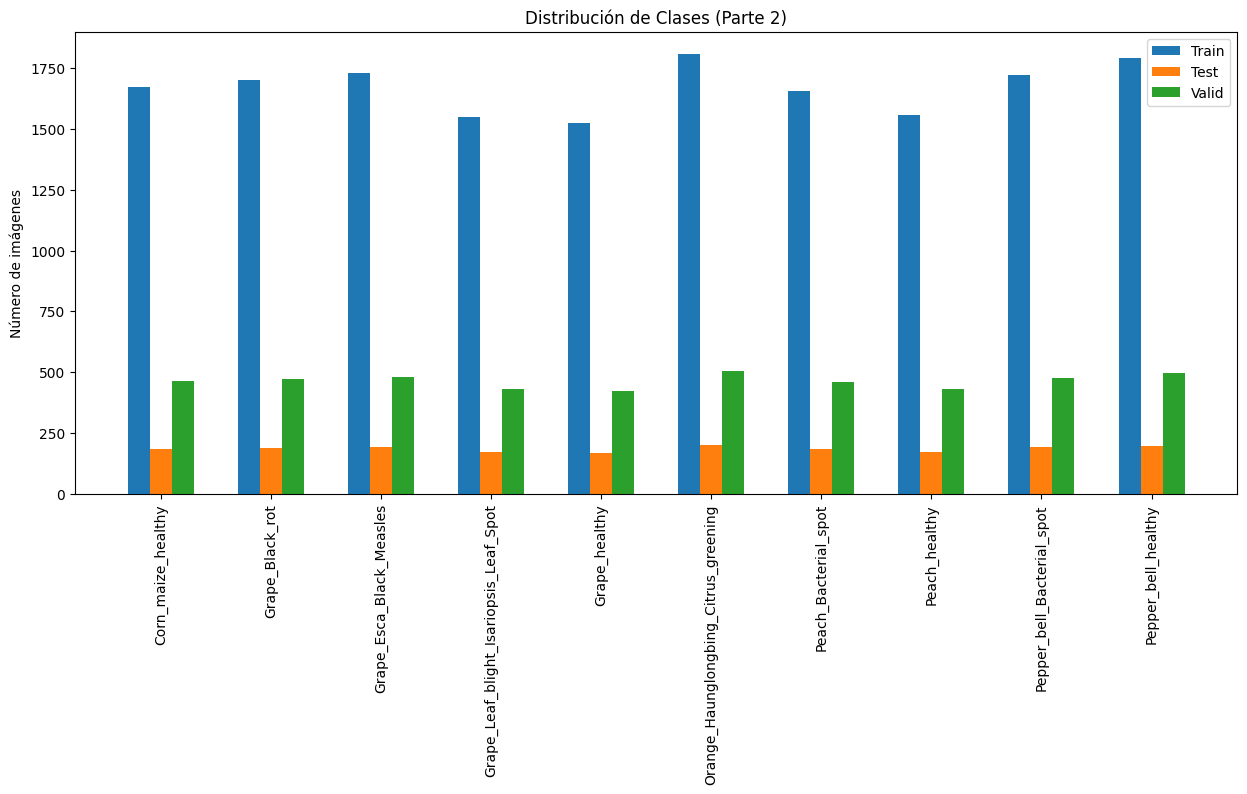

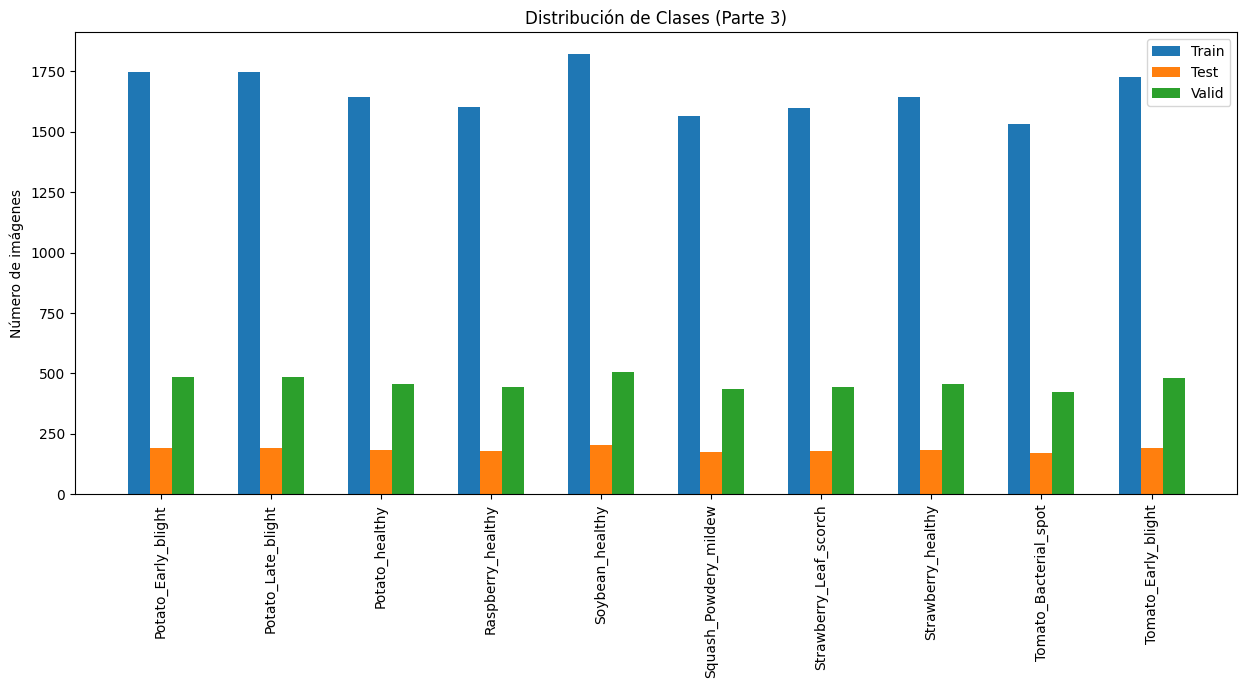

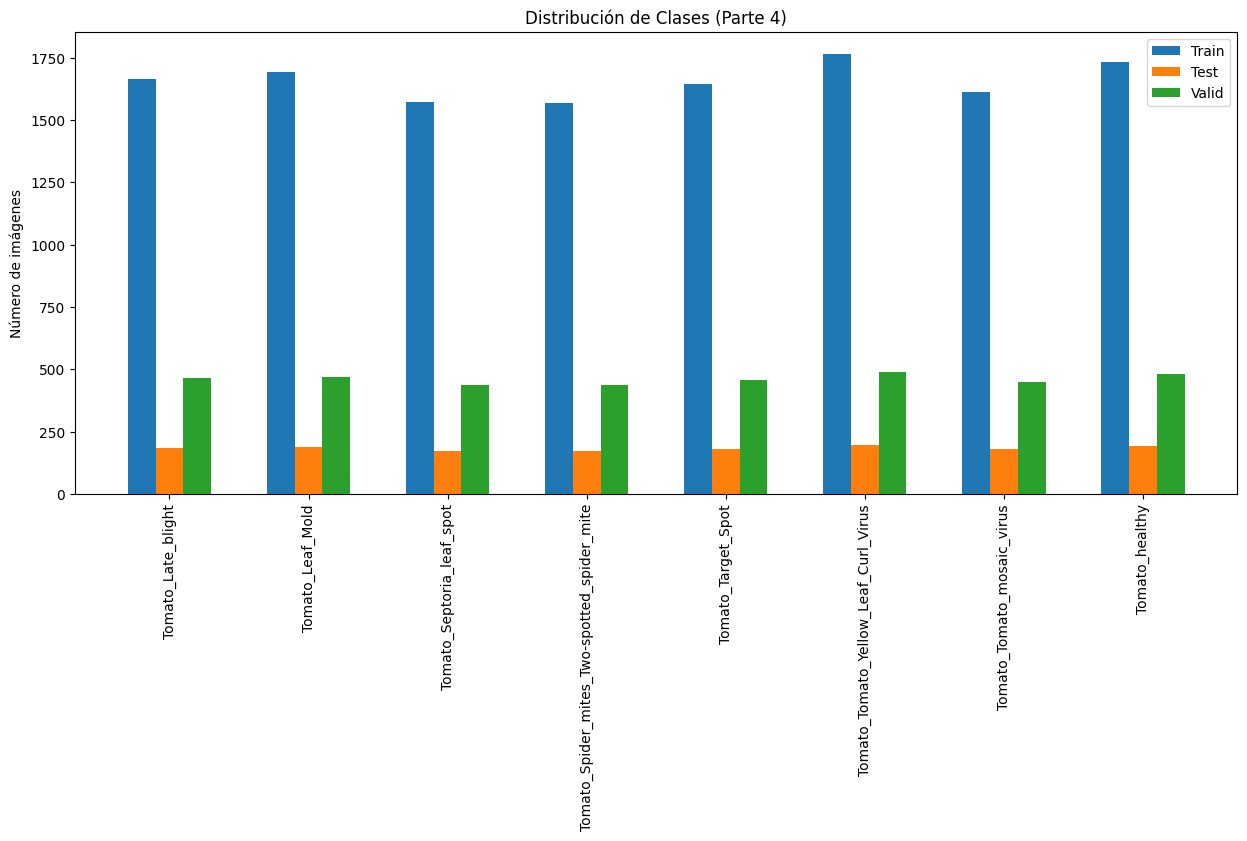

In [1]:
from src.utils.data_distribution import dataset_summary
dataset_summary("dataset")

Se puede observar que existe fotos de diferentes ángulos, iluminación y forma por lo que será necesario hacer un tratado de esa data. Además, se puede ver que la data está muy bien balanceada para las diferentes clases.

In [1]:
from src.utils.plantcv_filtering import PlantCVFilter

filtering = PlantCVFilter(debug=False)
filtered_results = filtering.filter_and_normalize_dataset("dataset", output_path="dataset_filtered")

print(f"Imágenes eliminadas por ser borrosas: {filtered_results['blurry_removed']}")



Filtrando y normalizando train...


Procesando Apple_Apple_scab: 100%|██████████| 1815/1815 [00:05<00:00, 311.64it/s]


Filtrado de Apple_Apple_scab en train completado.


Procesando Apple_Black_rot: 100%|██████████| 1789/1789 [00:06<00:00, 282.22it/s]


Filtrado de Apple_Black_rot en train completado.


Procesando Apple_Cedar_apple_rust: 100%|██████████| 1584/1584 [00:04<00:00, 335.72it/s]


Filtrado de Apple_Cedar_apple_rust en train completado.


Procesando Apple_healthy: 100%|██████████| 1808/1808 [00:05<00:00, 309.44it/s]


Filtrado de Apple_healthy en train completado.


Procesando Blueberry_healthy: 100%|██████████| 1635/1635 [00:05<00:00, 314.33it/s]


Filtrado de Blueberry_healthy en train completado.


Procesando Cherry_including_sour_healthy: 100%|██████████| 1644/1644 [00:05<00:00, 286.62it/s]


Filtrado de Cherry_including_sour_healthy en train completado.


Procesando Cherry_including_sour_Powdery_mildew: 100%|██████████| 1515/1515 [00:04<00:00, 359.62it/s]


Filtrado de Cherry_including_sour_Powdery_mildew en train completado.


Procesando Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot: 100%|██████████| 1478/1478 [00:05<00:00, 295.53it/s]


Filtrado de Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot en train completado.


Procesando Corn_maize_Common_rust_: 100%|██████████| 1717/1717 [00:05<00:00, 320.44it/s]


Filtrado de Corn_maize_Common_rust_ en train completado.


Procesando Corn_maize_healthy: 100%|██████████| 1674/1674 [00:04<00:00, 362.54it/s]


Filtrado de Corn_maize_healthy en train completado.


Procesando Corn_maize_Northern_Leaf_Blight: 100%|██████████| 1718/1718 [00:05<00:00, 310.44it/s]


Filtrado de Corn_maize_Northern_Leaf_Blight en train completado.


Procesando Grape_Black_rot: 100%|██████████| 1700/1700 [00:05<00:00, 297.51it/s]


Filtrado de Grape_Black_rot en train completado.


Procesando Grape_Esca_Black_Measles: 100%|██████████| 1728/1728 [00:05<00:00, 290.93it/s]


Filtrado de Grape_Esca_Black_Measles en train completado.


Procesando Grape_healthy: 100%|██████████| 1523/1523 [00:05<00:00, 300.88it/s]


Filtrado de Grape_healthy en train completado.


Procesando Grape_Leaf_blight_Isariopsis_Leaf_Spot: 100%|██████████| 1550/1550 [00:05<00:00, 287.02it/s]


Filtrado de Grape_Leaf_blight_Isariopsis_Leaf_Spot en train completado.


Procesando Orange_Haunglongbing_Citrus_greening: 100%|██████████| 1809/1809 [00:04<00:00, 377.76it/s]


Filtrado de Orange_Haunglongbing_Citrus_greening en train completado.


Procesando Peach_Bacterial_spot: 100%|██████████| 1655/1655 [00:05<00:00, 327.64it/s]


Filtrado de Peach_Bacterial_spot en train completado.


Procesando Peach_healthy: 100%|██████████| 1556/1556 [00:04<00:00, 327.61it/s]


Filtrado de Peach_healthy en train completado.


Procesando Pepper_bell_Bacterial_spot: 100%|██████████| 1722/1722 [00:05<00:00, 296.66it/s]


Filtrado de Pepper_bell_Bacterial_spot en train completado.


Procesando Pepper_bell_healthy: 100%|██████████| 1790/1790 [00:06<00:00, 296.75it/s]


Filtrado de Pepper_bell_healthy en train completado.


Procesando Potato_Early_blight: 100%|██████████| 1746/1746 [00:05<00:00, 296.29it/s]


Filtrado de Potato_Early_blight en train completado.


Procesando Potato_healthy: 100%|██████████| 1642/1642 [00:05<00:00, 281.65it/s]


Filtrado de Potato_healthy en train completado.


Procesando Potato_Late_blight: 100%|██████████| 1746/1746 [00:05<00:00, 306.25it/s]


Filtrado de Potato_Late_blight en train completado.


Procesando Raspberry_healthy: 100%|██████████| 1603/1603 [00:05<00:00, 290.01it/s]


Filtrado de Raspberry_healthy en train completado.


Procesando Soybean_healthy: 100%|██████████| 1820/1820 [00:06<00:00, 290.23it/s]


Filtrado de Soybean_healthy en train completado.


Procesando Squash_Powdery_mildew: 100%|██████████| 1563/1563 [00:05<00:00, 292.05it/s]


Filtrado de Squash_Powdery_mildew en train completado.


Procesando Strawberry_healthy: 100%|██████████| 1642/1642 [00:05<00:00, 279.74it/s]


Filtrado de Strawberry_healthy en train completado.


Procesando Strawberry_Leaf_scorch: 100%|██████████| 1597/1597 [00:05<00:00, 280.28it/s]


Filtrado de Strawberry_Leaf_scorch en train completado.


Procesando Tomato_Bacterial_spot: 100%|██████████| 1532/1532 [00:04<00:00, 313.89it/s]


Filtrado de Tomato_Bacterial_spot en train completado.


Procesando Tomato_Early_blight: 100%|██████████| 1728/1728 [00:05<00:00, 299.57it/s]


Filtrado de Tomato_Early_blight en train completado.


Procesando Tomato_healthy: 100%|██████████| 1734/1734 [00:06<00:00, 279.62it/s]


Filtrado de Tomato_healthy en train completado.


Procesando Tomato_Late_blight: 100%|██████████| 1666/1666 [00:05<00:00, 312.76it/s]


Filtrado de Tomato_Late_blight en train completado.


Procesando Tomato_Leaf_Mold: 100%|██████████| 1694/1694 [00:05<00:00, 298.82it/s]


Filtrado de Tomato_Leaf_Mold en train completado.


Procesando Tomato_Septoria_leaf_spot: 100%|██████████| 1571/1571 [00:05<00:00, 286.65it/s]


Filtrado de Tomato_Septoria_leaf_spot en train completado.


Procesando Tomato_Spider_mites_Two-spotted_spider_mite: 100%|██████████| 1567/1567 [00:05<00:00, 271.40it/s]


Filtrado de Tomato_Spider_mites_Two-spotted_spider_mite en train completado.


Procesando Tomato_Target_Spot: 100%|██████████| 1645/1645 [00:06<00:00, 268.88it/s]


Filtrado de Tomato_Target_Spot en train completado.


Procesando Tomato_Tomato_mosaic_virus: 100%|██████████| 1611/1611 [00:05<00:00, 285.56it/s]


Filtrado de Tomato_Tomato_mosaic_virus en train completado.


Procesando Tomato_Tomato_Yellow_Leaf_Curl_Virus: 100%|██████████| 1765/1765 [00:05<00:00, 352.07it/s]


Filtrado de Tomato_Tomato_Yellow_Leaf_Curl_Virus en train completado.
Filtrando y normalizando test...


Procesando Apple_Apple_scab: 100%|██████████| 201/201 [00:00<00:00, 301.65it/s]


Filtrado de Apple_Apple_scab en test completado.


Procesando Apple_Black_rot: 100%|██████████| 198/198 [00:00<00:00, 291.17it/s]


Filtrado de Apple_Black_rot en test completado.


Procesando Apple_Cedar_apple_rust: 100%|██████████| 176/176 [00:00<00:00, 337.61it/s]


Filtrado de Apple_Cedar_apple_rust en test completado.


Procesando Apple_healthy: 100%|██████████| 200/200 [00:00<00:00, 308.62it/s]


Filtrado de Apple_healthy en test completado.


Procesando Blueberry_healthy: 100%|██████████| 181/181 [00:00<00:00, 277.72it/s]


Filtrado de Blueberry_healthy en test completado.


Procesando Cherry_including_sour_healthy: 100%|██████████| 182/182 [00:00<00:00, 265.86it/s]


Filtrado de Cherry_including_sour_healthy en test completado.


Procesando Cherry_including_sour_Powdery_mildew: 100%|██████████| 168/168 [00:00<00:00, 320.41it/s]


Filtrado de Cherry_including_sour_Powdery_mildew en test completado.


Procesando Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot: 100%|██████████| 164/164 [00:00<00:00, 287.38it/s]


Filtrado de Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot en test completado.


Procesando Corn_maize_Common_rust_: 100%|██████████| 190/190 [00:00<00:00, 309.35it/s]


Filtrado de Corn_maize_Common_rust_ en test completado.


Procesando Corn_maize_healthy: 100%|██████████| 185/185 [00:00<00:00, 366.73it/s]


Filtrado de Corn_maize_healthy en test completado.


Procesando Corn_maize_Northern_Leaf_Blight: 100%|██████████| 190/190 [00:00<00:00, 300.21it/s]


Filtrado de Corn_maize_Northern_Leaf_Blight en test completado.


Procesando Grape_Black_rot: 100%|██████████| 188/188 [00:00<00:00, 277.00it/s]


Filtrado de Grape_Black_rot en test completado.


Procesando Grape_Esca_Black_Measles: 100%|██████████| 192/192 [00:00<00:00, 263.44it/s]


Filtrado de Grape_Esca_Black_Measles en test completado.


Procesando Grape_healthy: 100%|██████████| 169/169 [00:00<00:00, 304.31it/s]


Filtrado de Grape_healthy en test completado.


Procesando Grape_Leaf_blight_Isariopsis_Leaf_Spot: 100%|██████████| 172/172 [00:00<00:00, 282.96it/s]


Filtrado de Grape_Leaf_blight_Isariopsis_Leaf_Spot en test completado.


Procesando Orange_Haunglongbing_Citrus_greening: 100%|██████████| 201/201 [00:00<00:00, 380.83it/s]


Filtrado de Orange_Haunglongbing_Citrus_greening en test completado.


Procesando Peach_Bacterial_spot: 100%|██████████| 183/183 [00:00<00:00, 312.25it/s]


Filtrado de Peach_Bacterial_spot en test completado.


Procesando Peach_healthy: 100%|██████████| 172/172 [00:00<00:00, 305.51it/s]


Filtrado de Peach_healthy en test completado.


Procesando Pepper_bell_Bacterial_spot: 100%|██████████| 191/191 [00:00<00:00, 269.36it/s]


Filtrado de Pepper_bell_Bacterial_spot en test completado.


Procesando Pepper_bell_healthy: 100%|██████████| 198/198 [00:00<00:00, 270.21it/s]


Filtrado de Pepper_bell_healthy en test completado.


Procesando Potato_Early_blight: 100%|██████████| 193/193 [00:00<00:00, 281.88it/s]


Filtrado de Potato_Early_blight en test completado.


Procesando Potato_healthy: 100%|██████████| 182/182 [00:00<00:00, 282.86it/s]


Filtrado de Potato_healthy en test completado.


Procesando Potato_Late_blight: 100%|██████████| 193/193 [00:00<00:00, 290.88it/s]


Filtrado de Potato_Late_blight en test completado.


Procesando Raspberry_healthy: 100%|██████████| 178/178 [00:00<00:00, 288.75it/s]


Filtrado de Raspberry_healthy en test completado.


Procesando Soybean_healthy: 100%|██████████| 202/202 [00:00<00:00, 279.91it/s]


Filtrado de Soybean_healthy en test completado.


Procesando Squash_Powdery_mildew: 100%|██████████| 173/173 [00:00<00:00, 283.13it/s]


Filtrado de Squash_Powdery_mildew en test completado.


Procesando Strawberry_healthy: 100%|██████████| 182/182 [00:00<00:00, 270.98it/s]


Filtrado de Strawberry_healthy en test completado.


Procesando Strawberry_Leaf_scorch: 100%|██████████| 177/177 [00:00<00:00, 282.24it/s]


Filtrado de Strawberry_Leaf_scorch en test completado.


Procesando Tomato_Bacterial_spot: 100%|██████████| 170/170 [00:00<00:00, 319.22it/s]


Filtrado de Tomato_Bacterial_spot en test completado.


Procesando Tomato_Early_blight: 100%|██████████| 192/192 [00:00<00:00, 294.62it/s]


Filtrado de Tomato_Early_blight en test completado.


Procesando Tomato_healthy: 100%|██████████| 192/192 [00:00<00:00, 266.22it/s]


Filtrado de Tomato_healthy en test completado.


Procesando Tomato_Late_blight: 100%|██████████| 185/185 [00:00<00:00, 300.19it/s]


Filtrado de Tomato_Late_blight en test completado.


Procesando Tomato_Leaf_Mold: 100%|██████████| 188/188 [00:00<00:00, 287.82it/s]


Filtrado de Tomato_Leaf_Mold en test completado.


Procesando Tomato_Septoria_leaf_spot: 100%|██████████| 174/174 [00:00<00:00, 270.28it/s]


Filtrado de Tomato_Septoria_leaf_spot en test completado.


Procesando Tomato_Spider_mites_Two-spotted_spider_mite: 100%|██████████| 174/174 [00:00<00:00, 276.00it/s]


Filtrado de Tomato_Spider_mites_Two-spotted_spider_mite en test completado.


Procesando Tomato_Target_Spot: 100%|██████████| 182/182 [00:00<00:00, 283.28it/s]


Filtrado de Tomato_Target_Spot en test completado.


Procesando Tomato_Tomato_mosaic_virus: 100%|██████████| 179/179 [00:00<00:00, 274.08it/s]


Filtrado de Tomato_Tomato_mosaic_virus en test completado.


Procesando Tomato_Tomato_Yellow_Leaf_Curl_Virus: 100%|██████████| 196/196 [00:00<00:00, 330.69it/s]


Filtrado de Tomato_Tomato_Yellow_Leaf_Curl_Virus en test completado.
Filtrando y normalizando valid...


Procesando Apple_Apple_scab: 100%|██████████| 504/504 [00:01<00:00, 298.26it/s]


Filtrado de Apple_Apple_scab en valid completado.


Procesando Apple_Black_rot: 100%|██████████| 497/497 [00:01<00:00, 277.38it/s]


Filtrado de Apple_Black_rot en valid completado.


Procesando Apple_Cedar_apple_rust: 100%|██████████| 440/440 [00:01<00:00, 322.62it/s]


Filtrado de Apple_Cedar_apple_rust en valid completado.


Procesando Apple_healthy: 100%|██████████| 502/502 [00:01<00:00, 304.99it/s]


Filtrado de Apple_healthy en valid completado.


Procesando Blueberry_healthy: 100%|██████████| 454/454 [00:01<00:00, 284.36it/s]


Filtrado de Blueberry_healthy en valid completado.


Procesando Cherry_including_sour_healthy: 100%|██████████| 456/456 [00:02<00:00, 200.75it/s]


Filtrado de Cherry_including_sour_healthy en valid completado.


Procesando Cherry_including_sour_Powdery_mildew: 100%|██████████| 421/421 [00:01<00:00, 248.58it/s]


Filtrado de Cherry_including_sour_Powdery_mildew en valid completado.


Procesando Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot: 100%|██████████| 410/410 [00:01<00:00, 268.01it/s]


Filtrado de Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot en valid completado.


Procesando Corn_maize_Common_rust_: 100%|██████████| 477/477 [00:01<00:00, 260.00it/s]


Filtrado de Corn_maize_Common_rust_ en valid completado.


Procesando Corn_maize_healthy: 100%|██████████| 465/465 [00:01<00:00, 322.58it/s]


Filtrado de Corn_maize_healthy en valid completado.


Procesando Corn_maize_Northern_Leaf_Blight: 100%|██████████| 477/477 [00:01<00:00, 244.49it/s]


Filtrado de Corn_maize_Northern_Leaf_Blight en valid completado.


Procesando Grape_Black_rot: 100%|██████████| 472/472 [00:01<00:00, 250.12it/s]


Filtrado de Grape_Black_rot en valid completado.


Procesando Grape_Esca_Black_Measles: 100%|██████████| 480/480 [00:02<00:00, 228.71it/s]


Filtrado de Grape_Esca_Black_Measles en valid completado.


Procesando Grape_healthy: 100%|██████████| 423/423 [00:01<00:00, 248.43it/s]


Filtrado de Grape_healthy en valid completado.


Procesando Grape_Leaf_blight_Isariopsis_Leaf_Spot: 100%|██████████| 430/430 [00:01<00:00, 238.73it/s]


Filtrado de Grape_Leaf_blight_Isariopsis_Leaf_Spot en valid completado.


Procesando Orange_Haunglongbing_Citrus_greening: 100%|██████████| 503/503 [00:01<00:00, 326.16it/s]


Filtrado de Orange_Haunglongbing_Citrus_greening en valid completado.


Procesando Peach_Bacterial_spot: 100%|██████████| 459/459 [00:01<00:00, 269.56it/s]


Filtrado de Peach_Bacterial_spot en valid completado.


Procesando Peach_healthy: 100%|██████████| 432/432 [00:01<00:00, 270.85it/s]


Filtrado de Peach_healthy en valid completado.


Procesando Pepper_bell_Bacterial_spot: 100%|██████████| 478/478 [00:01<00:00, 241.91it/s]


Filtrado de Pepper_bell_Bacterial_spot en valid completado.


Procesando Pepper_bell_healthy: 100%|██████████| 497/497 [00:01<00:00, 263.65it/s]


Filtrado de Pepper_bell_healthy en valid completado.


Procesando Potato_Early_blight: 100%|██████████| 485/485 [00:01<00:00, 248.48it/s]


Filtrado de Potato_Early_blight en valid completado.


Procesando Potato_healthy: 100%|██████████| 456/456 [00:01<00:00, 254.33it/s]


Filtrado de Potato_healthy en valid completado.


Procesando Potato_Late_blight: 100%|██████████| 485/485 [00:01<00:00, 263.67it/s]


Filtrado de Potato_Late_blight en valid completado.


Procesando Raspberry_healthy: 100%|██████████| 445/445 [00:01<00:00, 256.52it/s]


Filtrado de Raspberry_healthy en valid completado.


Procesando Soybean_healthy: 100%|██████████| 505/505 [00:01<00:00, 256.75it/s]


Filtrado de Soybean_healthy en valid completado.


Procesando Squash_Powdery_mildew: 100%|██████████| 434/434 [00:01<00:00, 269.10it/s]


Filtrado de Squash_Powdery_mildew en valid completado.


Procesando Strawberry_healthy: 100%|██████████| 456/456 [00:01<00:00, 246.08it/s]


Filtrado de Strawberry_healthy en valid completado.


Procesando Strawberry_Leaf_scorch: 100%|██████████| 444/444 [00:01<00:00, 251.74it/s]


Filtrado de Strawberry_Leaf_scorch en valid completado.


Procesando Tomato_Bacterial_spot: 100%|██████████| 425/425 [00:01<00:00, 279.31it/s]


Filtrado de Tomato_Bacterial_spot en valid completado.


Procesando Tomato_Early_blight: 100%|██████████| 480/480 [00:01<00:00, 262.01it/s]


Filtrado de Tomato_Early_blight en valid completado.


Procesando Tomato_healthy: 100%|██████████| 481/481 [00:01<00:00, 241.10it/s]


Filtrado de Tomato_healthy en valid completado.


Procesando Tomato_Late_blight: 100%|██████████| 463/463 [00:01<00:00, 274.01it/s]


Filtrado de Tomato_Late_blight en valid completado.


Procesando Tomato_Leaf_Mold: 100%|██████████| 470/470 [00:01<00:00, 255.52it/s]


Filtrado de Tomato_Leaf_Mold en valid completado.


Procesando Tomato_Septoria_leaf_spot: 100%|██████████| 436/436 [00:01<00:00, 251.08it/s]


Filtrado de Tomato_Septoria_leaf_spot en valid completado.


Procesando Tomato_Spider_mites_Two-spotted_spider_mite: 100%|██████████| 435/435 [00:01<00:00, 243.84it/s]


Filtrado de Tomato_Spider_mites_Two-spotted_spider_mite en valid completado.


Procesando Tomato_Target_Spot: 100%|██████████| 457/457 [00:01<00:00, 245.97it/s]


Filtrado de Tomato_Target_Spot en valid completado.


Procesando Tomato_Tomato_mosaic_virus: 100%|██████████| 448/448 [00:01<00:00, 256.20it/s]


Filtrado de Tomato_Tomato_mosaic_virus en valid completado.


Procesando Tomato_Tomato_Yellow_Leaf_Curl_Virus: 100%|██████████| 490/490 [00:01<00:00, 295.73it/s]

Filtrado de Tomato_Tomato_Yellow_Leaf_Curl_Virus en valid completado.
Filtrado y normalización completados.
Imágenes eliminadas por ser borrosas: 2224


In [ ]:
from src.utils.plantcv_processing import PlantCVPreprocessor

preprocessor    = PlantCVPreprocessor(debug=False)
dataset_results = preprocessor.preprocess_dataset("dataset")


Procesando train...


Procesando Apple_Apple_scab: 100%|██████████| 1815/1815 [00:00<?, ?it/s]


Procesamiento de Apple_Apple_scab en train completado.


## Modelos de clasificacion multiclases

In [ ]:
!nvidia-smi

In [3]:
#pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121 --timeout 1000 --retries 10
import torch

if torch.cuda.is_available():
    device_count = torch.cuda.device_count()
    print(f"{device_count} GPU(s) available:")
    for i in range(device_count):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(torch.backends.cudnn.version())  # Versión de cuDNN
        print(torch.cuda.get_device_name(0))  # Debe mostrar RTX 4060
else:
    print("No CUDA compatible GPU detected.")


1 GPU(s) available:
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU
90100
NVIDIA GeForce RTX 4060 Laptop GPU


In [ ]:
# Se crean los modelos y se los entrenan
from src.models.model import baseLineModel

# Número de clases detectadas en el dataset
num_classes = len(class_names)

# Inicializar el modelo
model = baseLineModel(num_classes)
print(model)


In [ ]:
def reset_weights(m):
    if hasattr(m, "reset_parameters"):
        m.reset_parameters()

In [ ]:
from src.models.train import train_model

model.apply(reset_weights)

# Definir hiperparámetros
num_epochs = 10
learning_rate = 0.001

# Entrenar el modelo
trained_model, history1 = train_model(model, train_loader, valid_loader, num_epochs, learning_rate)

Se guardan los pesos de este modelo para usarlo en las proximas predicciones

In [ ]:
torch.save(trained_model.state_dict(), "base_line.pth")

## Comparacion de los mejores modelos obtenidos

In [ ]:
# Se compara los modelos obtenidos y se decide por el mejor
from src.models.evaluate import evaluate_model
test_loss, test_acc = evaluate_model(trained_model, test_loader)


## Predicciones con el mejor modelo para este caso

En caso que se quiera usar un modelo ya entrenado previamente

In [ ]:
import torch
from src.models.model import baseLineModel  # Importa la arquitectura de tu modelo

num_classes = len(class_names)

# Inicializar el modelo
trained_model = baseLineModel(num_classes)

# Cargar los pesos entrenados
trained_model.load_state_dict(torch.load("base_line.pth"))

# Poner el modelo en modo evaluación
trained_model.eval()

print("Modelo cargado exitosamente.")

In [ ]:
#Se crea una clase para hacer la prediccion en base a una imagen nueva
from src.models.predict import predict_image
#predicted_class, confidence = predict_image(image_path="./data/test/Late_blight/test_late_blight_1.JPG",model=trained_model,
#                                            class_names=class_names
#)
predicted_class, confidence = predict_image(image_path="./data/test/Late_blight/test_late_blight_1.JPG",weights_path="base_line.pth",
    class_names=class_names
)

print(f"La enfermedad detectada es: {predicted_class} con una probabilidad de {confidence:.2%}")